In [65]:
#load the necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import string
import nltk



# Downloading the WordNet corpus
nltk.download('wordnet')

from scipy import stats
from scipy.stats import norm, chi2_contingency, f_oneway

#filter warnings
from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #Lemmatization: Converts a word to its root form based on its meaning.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.calibration import CalibratedClassifierCV
from tempfile import mkdtemp
from sklearn.decomposition import KernelPCA, PCA
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/izinnoushad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Set <a class="anchor" id="dataset"></a>
---
The dataset consists of 413,768 records and 16 attributes, each representing various personal and lifestyle characteristics of individuals. The dataset aims to provide a comprehensive overview of factors that may influence mental health, particularly focusing on aspects related to depression. The attributes include demographic information (e.g., age, marital status, education), lifestyle factors (e.g., smoking status, physical activity level, alcohol consumption), and medical history (e.g., history of mental illness, substance abuse, chronic medical conditions).


### Data Dictionary <a class="anchor" id="dict"></a>

To help with the analysis, study the data dictionary below.

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Description</th>
  </tr>
  <tr>
    <td>Name</td>
    <td>The name of the individual (anonymized for privacy).</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>The age of the individual (in years).</td>
  </tr>
  <tr>
    <td>Marital Status</td>
    <td>The marital status (e.g., Single, Married, Divorced, Widowed).</td>
  </tr>
  <tr>
    <td>Education Level</td>
    <td>The highest level of education attained (e.g., High School, Bachelor's, Master's).</td>
  </tr>
  <tr>
    <td>Number of Children</td>
    <td>The number of children the individual has.</td>
  </tr>
  <tr>
    <td>Smoking Status</td>
    <td>Indicates whether the individual is a smoker or non-smoker.</td>
  </tr>
  <tr>
    <td>Physical Activity Level</td>
    <td>The level of physical activity (e.g., Sedentary, Moderate, Active).</td>
  </tr>
  <tr>
    <td>Employment Status</td>
    <td>Employment status (e.g., Employed, Unemployed, Retired).</td>
  </tr>
  <tr>
    <td>Income</td>
    <td>Annual income of the individual (in USD).</td>
  </tr>
  <tr>
    <td>Alcohol Consumption</td>
    <td>Level of alcohol consumption (e.g., Low, Moderate, High).</td>
  </tr>
  <tr>
    <td>Dietary Habits</td>
    <td>Indicates the dietary habits (e.g., Healthy, Moderate, Unhealthy).</td>
  </tr>
  <tr>
    <td>Sleep Patterns</td>
    <td>Quality of sleep (e.g., Good, Fair, Poor).</td>
  </tr>
  <tr>
    <td>History of Mental Illness</td>
    <td>Whether the individual has a history of mental health issues (Yes/No).</td>
  </tr>
  <tr>
    <td>History of Substance Abuse</td>
    <td>Indicates if there is a history of substance abuse (Yes/No).</td>
  </tr>
  <tr>
    <td>Family History of Depression</td>
    <td>Indicates if there is a family history of depression (Yes/No).</td>
  </tr>
  <tr>
    <td>Chronic Medical Conditions</td>
    <td>Whether the individual has chronic medical conditions (Yes/No).</td>
  </tr>
</table>


## Initial Data Cleaning <a class="anchor" id="cleaning"></a>
---


### Plan of action <a class="anchor" id="action"></a>

1. Data Loading
2. Initial Data Assessment
2. Data Cleaning
    - Dealing with duplicated values
    - Dealing with redundant columns
    - Dealing with null values
3. EDA
4. Draw insights
5. Formulate a conclusion

### Data Loading <a class="anchor" id="load"></a>
---

In [ ]:
# Reading the CSV file downloaded from Kaggle
df = pd.read_csv(r'/Users/izinnoushad/Documents/binaryMAchineLearning/Binary-predictor-based-machine-learning-models-for-depression-masters-project/Model_Training/depression_data.csv')

In [91]:
# New DF
df.head(4)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No


### Data Assesment <a class="anchor" id="assess"></a>
---

First lets take a look at the number of rows and columns in this data set

In [68]:
# Check the shape of the data:
df.shape

(824, 13)

In [69]:
# Checking the value counts from our target
df.value_counts()

Age       Gender  Occupation  Days_Indoors        Growing_Stress  Quarantine_Frustrations  Changes_Habits  Mental_Health_History  Weight_Change  Mood_Swings  Coping_Struggles  Work_Interest  Social_Weakness
16-20     Female  Business    1-14 days           No              No                       Maybe           Yes                    Maybe          High         No                Yes            Yes                1
25-30     Male    Housewife   15-30 days          Yes             No                       Maybe           Yes                    No             Medium       No                Maybe          No                 1
                              1-14 days           Maybe           Yes                      Yes             Maybe                  No             Low          No                Yes            No                 1
                                                                                                           Yes                    Yes            Medium      

**Observations:**

The dataset contains 413,768 entries and 16 columns.

---


Next let familiarize ourselves with the data by checking th information contained in the data set.

Next Steps:
- Check data types and formats
- Check data types Date column (transfor obejct to date format)
- Check for duplicates
- Check missing data

---

In [70]:
df.info() # There is no nan values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Weight_Change            824 non-null    object
 9   Mood_Swings              824 non-null    object
 10  Coping_Struggles         824 non-null    object
 11  Work_Interest            824 non-null    object
 12  Social_Weakness          824 non-null    object
dtypes: object(13)
memory usage: 83.8+ KB


**Observations:**

This data set contains the following data types:

- `float64`(1)
- `int64`(2)
- `obect`(13)

There seems to not be columns with null values.

---

Next we will take a look at the number duplicate rows in the dataframe

In [71]:
# Check the number of duplicated rows. There are no duplicate rows in the dataset.
df.duplicated().sum()

0

In [72]:
# Identify all rows that are duplicated including their first occurrences
duplicate_rows_with_original = df[df.duplicated(keep=False)]

# Display the first two sets of duplicated rows with their original counterparts
duplicate_rows_with_original.head(4)  # showing both original and duplicated rows


,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness


**Observations:**

No duplicate entries were found.

---


Next we will take a look if any columns are duplicated by transposing the dataframe and running the duplicated function from above.

In [73]:
# Transpose the data frame and then look for duplicated rows to determine if any of the columns are duplicated:
#df.T.duplicated().sum() # this will take time to run!

**Observations:**

There is no duplicated columns in this data frame.

---

### Handling Missing Values <a class="anchor" id="missing"></a>

In [74]:
# Checking for missing values in each column. There are no missing values in the dataset.
missing_values = df.isnull().sum()
print(missing_values)

Age                        0
Gender                     0
Occupation                 0
Days_Indoors               0
Growing_Stress             0
Quarantine_Frustrations    0
Changes_Habits             0
Mental_Health_History      0
Weight_Change              0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
dtype: int64


In [75]:
#check for missing values:
null_counts = df.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls
#lets take a look at the percentage of the data that these nulls make up
percentage_nulls = columns_with_nulls/df.shape[0]*100
percentage_nulls

Series([], dtype: float64)

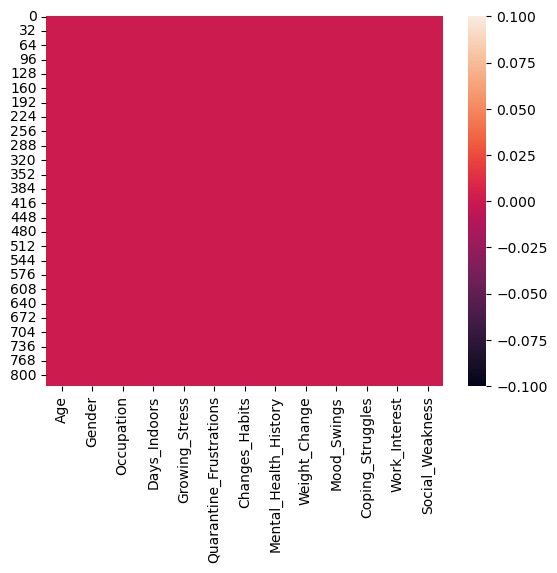

In [76]:
# Visualize missing data using a heatmap
sns.heatmap(df.isnull())
plt.show()

**Observations:**

There is no missing values.

---

## Finding Summary <a class="anchor" id="findings"></a>

The data has been assessed and cleaned by performing the following steps:

- Checking for duplicated
- Checking redundant or insignificant rows
- Checking columns with a high proportion of null values
- Converting date datatype to date format

Before we move forward let's create a copy of our df:

In [77]:
df_2 = df.copy()

In [78]:
# For sanity lets check the DF info and see if the total rows decreased by 539. Total should be 515199

In [79]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Weight_Change            824 non-null    object
 9   Mood_Swings              824 non-null    object
 10  Coping_Struggles         824 non-null    object
 11  Work_Interest            824 non-null    object
 12  Social_Weakness          824 non-null    object
dtypes: object(13)
memory usage: 83.8+ KB


## Understanding the Categorical Data Type for Future Analysis:

In [80]:
# Displaing the distribution of categorical columns:
for column in df_2.select_dtypes(include=['object']).columns:
    print(df_2[column].value_counts())

30-Above    222
16-20       211
25-30       205
20-25       186
Name: Age, dtype: int64
Female    434
Male      390
Name: Gender, dtype: int64
Housewife    185
Student      180
Corporate    159
Others       155
Business     145
Name: Occupation, dtype: int64
31-60 days            171
1-14 days             170
Go out Every day      168
More than 2 months    160
15-30 days            155
Name: Days_Indoors, dtype: int64
Yes      301
Maybe    267
No       256
Name: Growing_Stress, dtype: int64
Yes      304
Maybe    266
No       254
Name: Quarantine_Frustrations, dtype: int64
Yes      305
Maybe    268
No       251
Name: Changes_Habits, dtype: int64
No       284
Maybe    282
Yes      258
Name: Mental_Health_History, dtype: int64
Maybe    281
No       275
Yes      268
Name: Weight_Change, dtype: int64
Medium    280
Low       278
High      266
Name: Mood_Swings, dtype: int64
No     414
Yes    410
Name: Coping_Struggles, dtype: int64
No       295
Maybe    281
Yes      248
Name: Work_Interest, 

In [81]:
# Check for unique values in each categorical column to identify inconsistencies
unique_values = {column: df_2[column].unique() for column in df_2.select_dtypes(include=['object']).columns}

# Display the results for review
unique_values

{'Age': array(['20-25', '30-Above', '25-30', '16-20'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'Occupation': array(['Corporate', 'Others', 'Student', 'Housewife', 'Business'],
       dtype=object),
 'Days_Indoors': array(['1-14 days', '31-60 days', 'Go out Every day',
        'More than 2 months', '15-30 days'], dtype=object),
 'Growing_Stress': array(['Yes', 'No', 'Maybe'], dtype=object),
 'Quarantine_Frustrations': array(['Yes', 'No', 'Maybe'], dtype=object),
 'Changes_Habits': array(['No', 'Maybe', 'Yes'], dtype=object),
 'Mental_Health_History': array(['Yes', 'No', 'Maybe'], dtype=object),
 'Weight_Change': array(['Yes', 'No', 'Maybe'], dtype=object),
 'Mood_Swings': array(['Medium', 'High', 'Low'], dtype=object),
 'Coping_Struggles': array(['No', 'Yes'], dtype=object),
 'Work_Interest': array(['No', 'Maybe', 'Yes'], dtype=object),
 'Social_Weakness': array(['Yes', 'No', 'Maybe'], dtype=object)}

**Observations:**

The categorical columns have consistent and clear values, so no immediate corrections are needed. Here are the categories identified:

#### Possible Ordinal columns:
- **Marital Status**: Married, Widowed, Divorced, Single
- **Education Level**: Bachelor's Degree, High School, Master's Degree, Associate Degree, PhD
- **Smoking Status**: Non-smoker, Former, Current
- **Physical Activity Level**: Active, Sedentary, Moderate
- **Employment Status**: Unemployed, Employed
- **Alcohol Consumption**: Moderate, High, Low
- **Dietary Habits**: Moderate, Unhealthy, Healthy
- **Sleep Patterns**: Fair, Good, Poor
  

#### Possible Binary columns:
- **History of Mental Illness**: Yes, No
- **History of Substance Abuse**: No, Yes
- **Family History of Depression**: Yes, No
- **Chronic Medical Conditions**: Yes, No

# Step 2: EDA <a class="anchor" id="step2"></a>
## Table of Contents
---
1. [Data Assessment](#assessment)
2. [EDA](#eda)
3. [Feature Engineering (First Iteration)](#fa) #possible create low/high seasonal (1,0) holidays (1,0), Delta
4. [EDA - with new DF](#eda2)
5. [Conclusions](#conclusions)

In [82]:
#Lets take a look at the original statistical properties of the numerical columns
df_2.describe()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,824,824,824,824,824,824,824,824,824,824,824,824,824
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,No,Maybe,Medium,No,No,Maybe
freq,222,434,185,171,301,304,305,284,281,280,414,295,287


There are 3 numerical columns. The above shows a summary of core statistics for these columns:
- `Count`: Number of entries
- `Mean`: Average value down the colum
- `std`: The standard deviation
- `min`: The minimum value found in that column
- `Percentiles`: The upper, middle and lower percentile values of the data
- `max`: The max value of that column

## EDA <a class="anchor" id="eda"></a>

Lets split up the numerical and categorical columns for ease of EDA

In [83]:
numerical_columns = df_2.select_dtypes(include = ['int64', 'float64'])
categorical_columns = df_2.select_dtypes(include = ['object'])

First we are going to explore the numerical columns

In [84]:
for column in numerical_columns.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df_2[column], bins=10, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

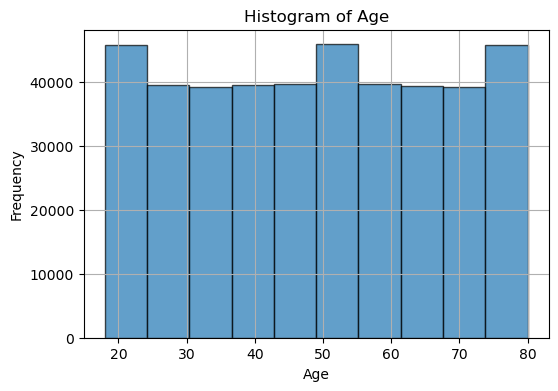

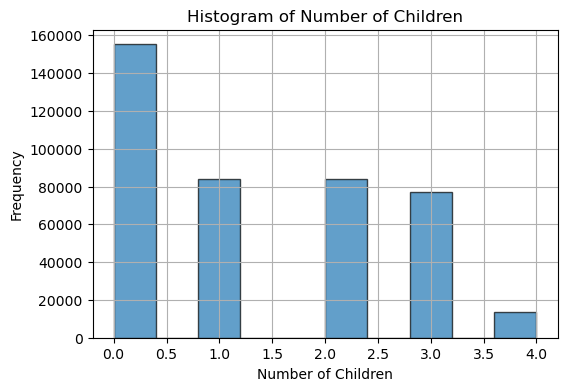

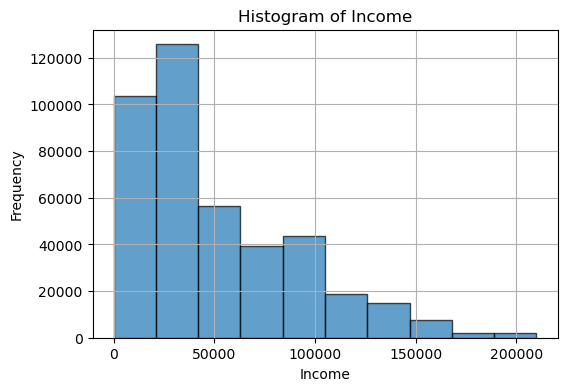

Seaborn automatically calculates the optimal bin size. While the distributions are similar, this provides a clearer and more accurate visualization of the true distribution.

In [85]:
# another way to visualize using seaborn
for column in numerical_columns.columns:

    column_mean=df_2[column].mean()
    column_median=df_2[column].median()

# Plot a histogram of the numerical columns, with lines marking mean and median
###
    plt.figure(figsize=(10,6))
    sns.histplot(df_2[column], kde=True)
    plt.axvline(column_mean, label='mean',color='r',linestyle='--')
    plt.axvline(column_median, label='median', color='r')
    plt.title(f'Histogram of {column}')
    plt.legend()

    plt.show()


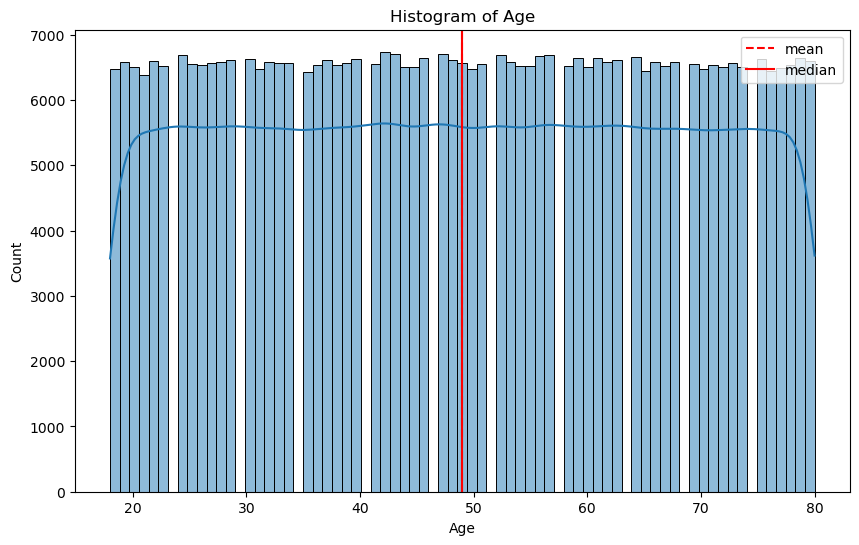

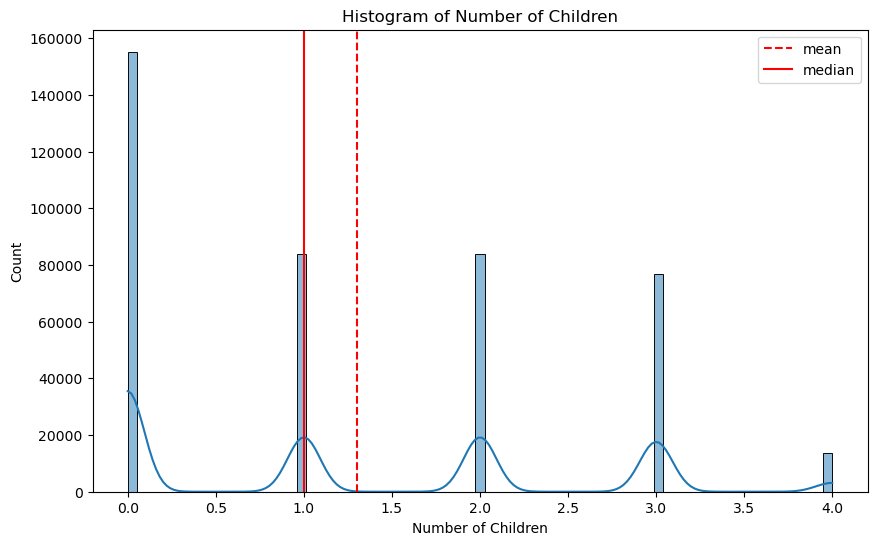

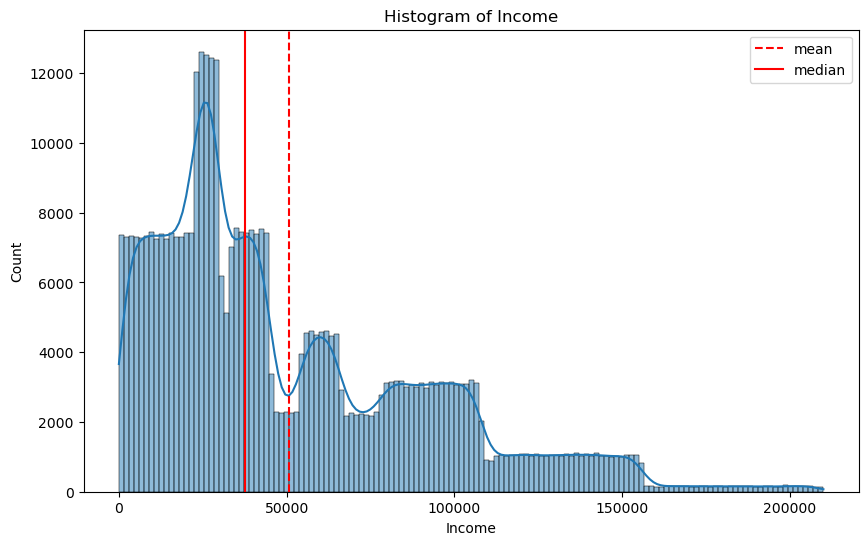

### Findings:

There are **3 numerical columns** for which we have plotted the histogram distributions above. Here are some notable observations:

1. **Age**:
   - The distribution of the `Age` column appears relatively balanced, centered around a mean and median of 49 years. There is no significant skew, suggesting a uniform spread of ages among individuals in the dataset.
   
2. **Number of Children**:
   - The `Number of Children` column is right-skewed, with most individuals having one or no children. This indicates that smaller family sizes are more common in the dataset, and a few individuals have larger numbers of children.

3. **Income**:
   - The `Income` column exhibits a right-skewed distribution. The majority of individuals have lower to moderate incomes, with the mean income being around 50,662 and the median at $37,520. This skew suggests that there are fewer individuals with higher incomes, which could affect the analysis, especially if income plays a significant role in predicting mental health outcomes.

These distributions help identify the patterns in the data and can guide the next steps in the analysis, such as handling skewed features, creating bins, or normalizing some of the skewed data. These actions may help improve the performance of predictive models and enable more effective exploratory analysis.

Lets now take a look at the categorical columns

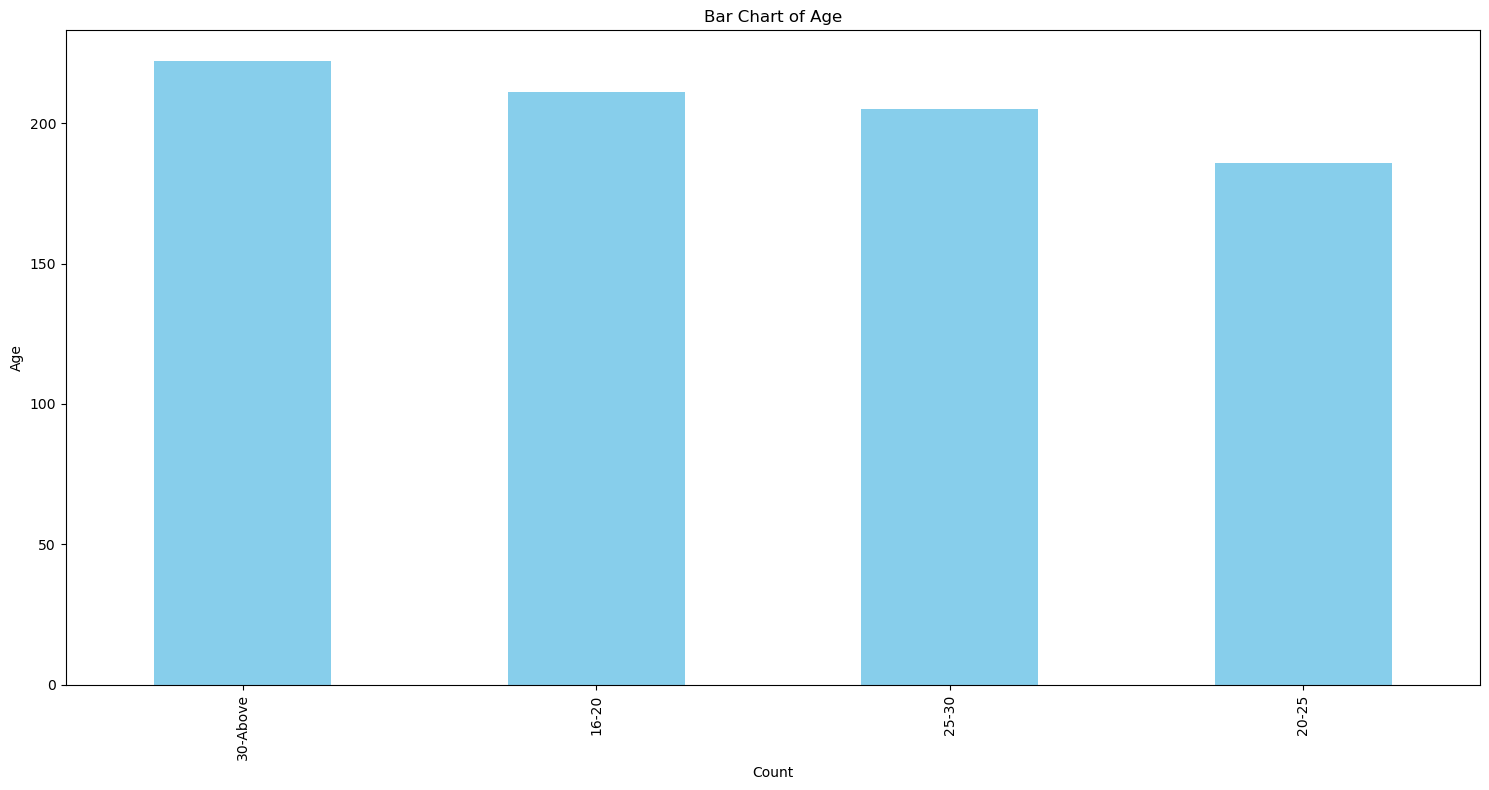

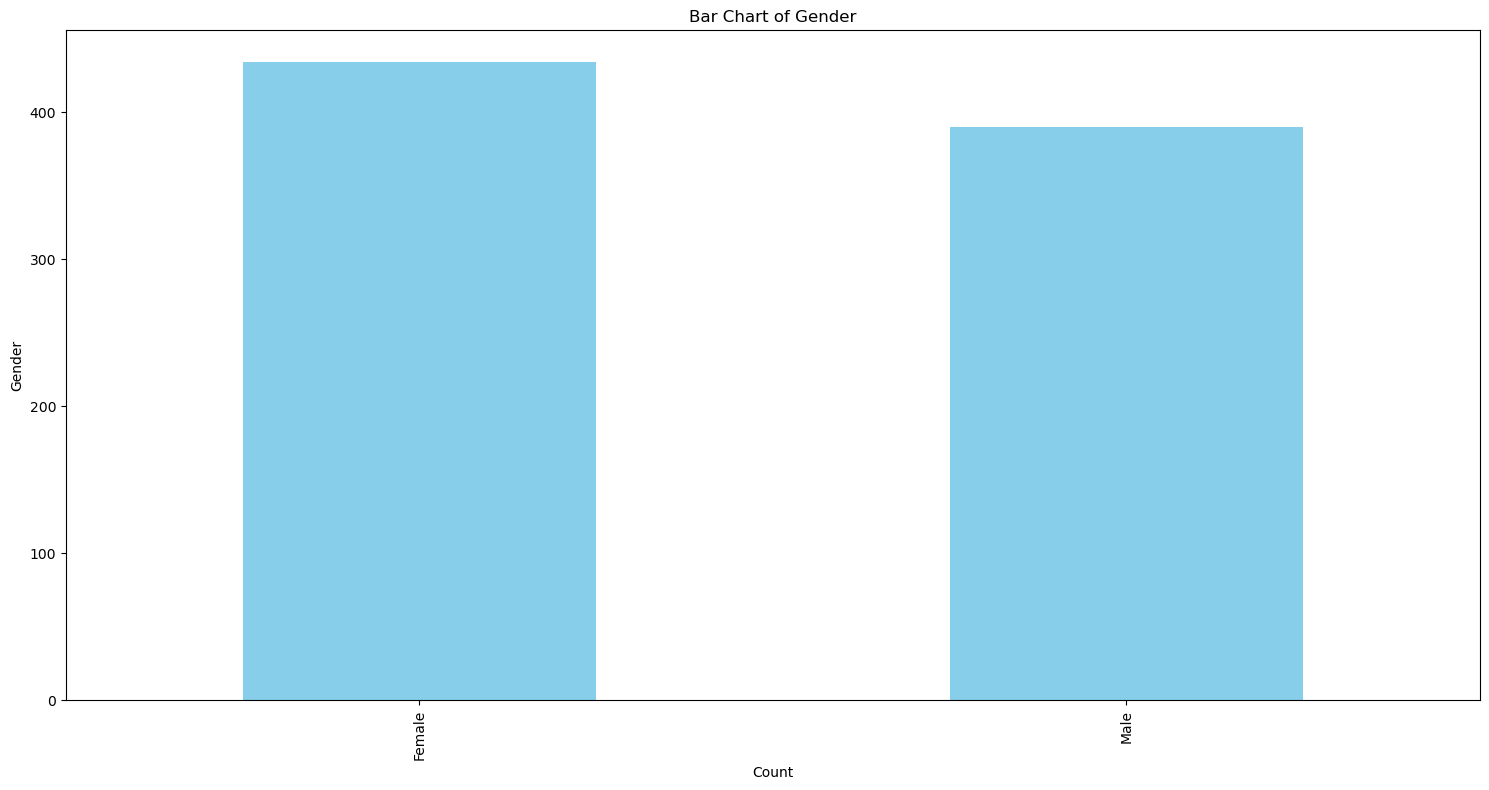

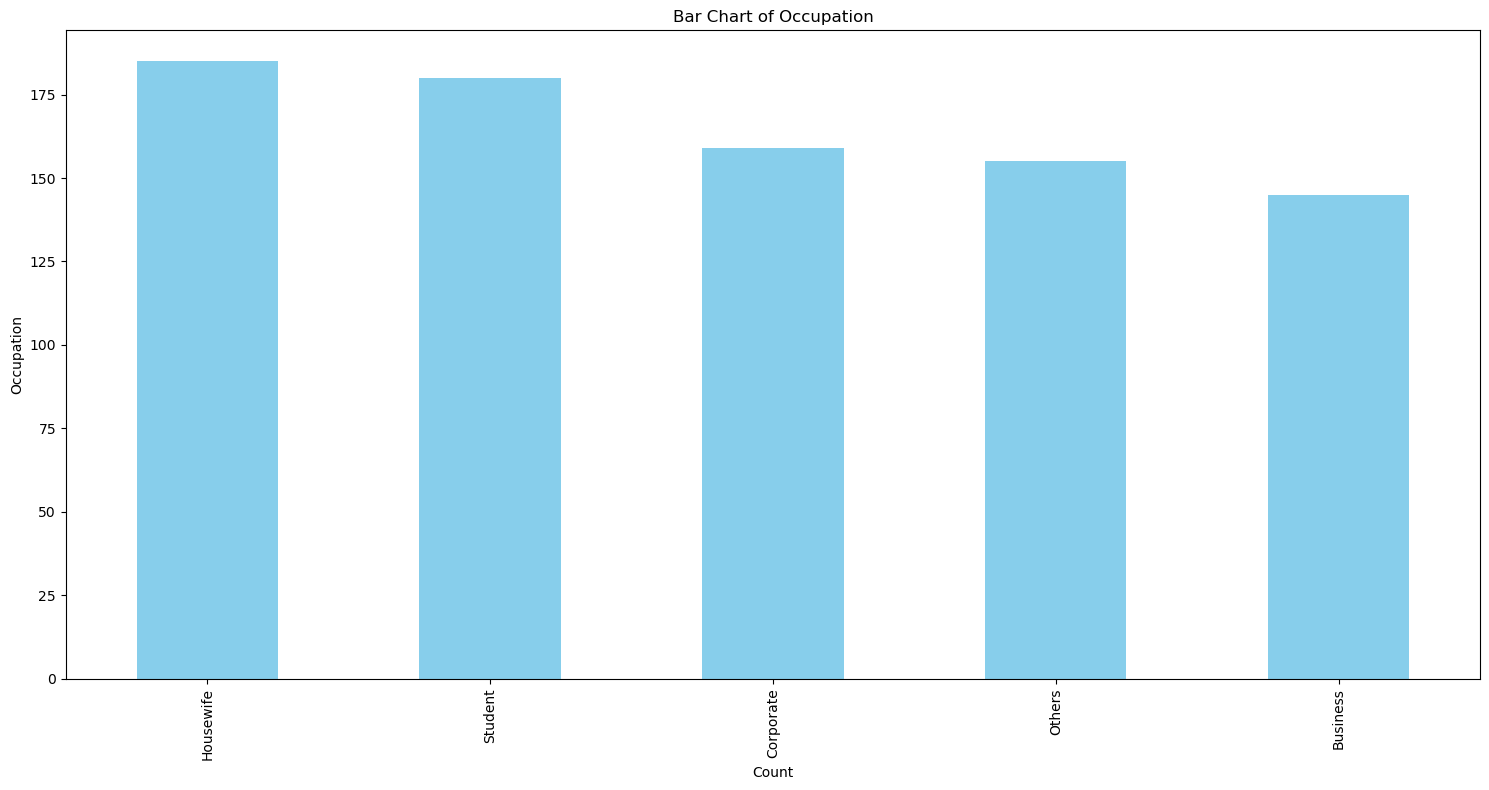

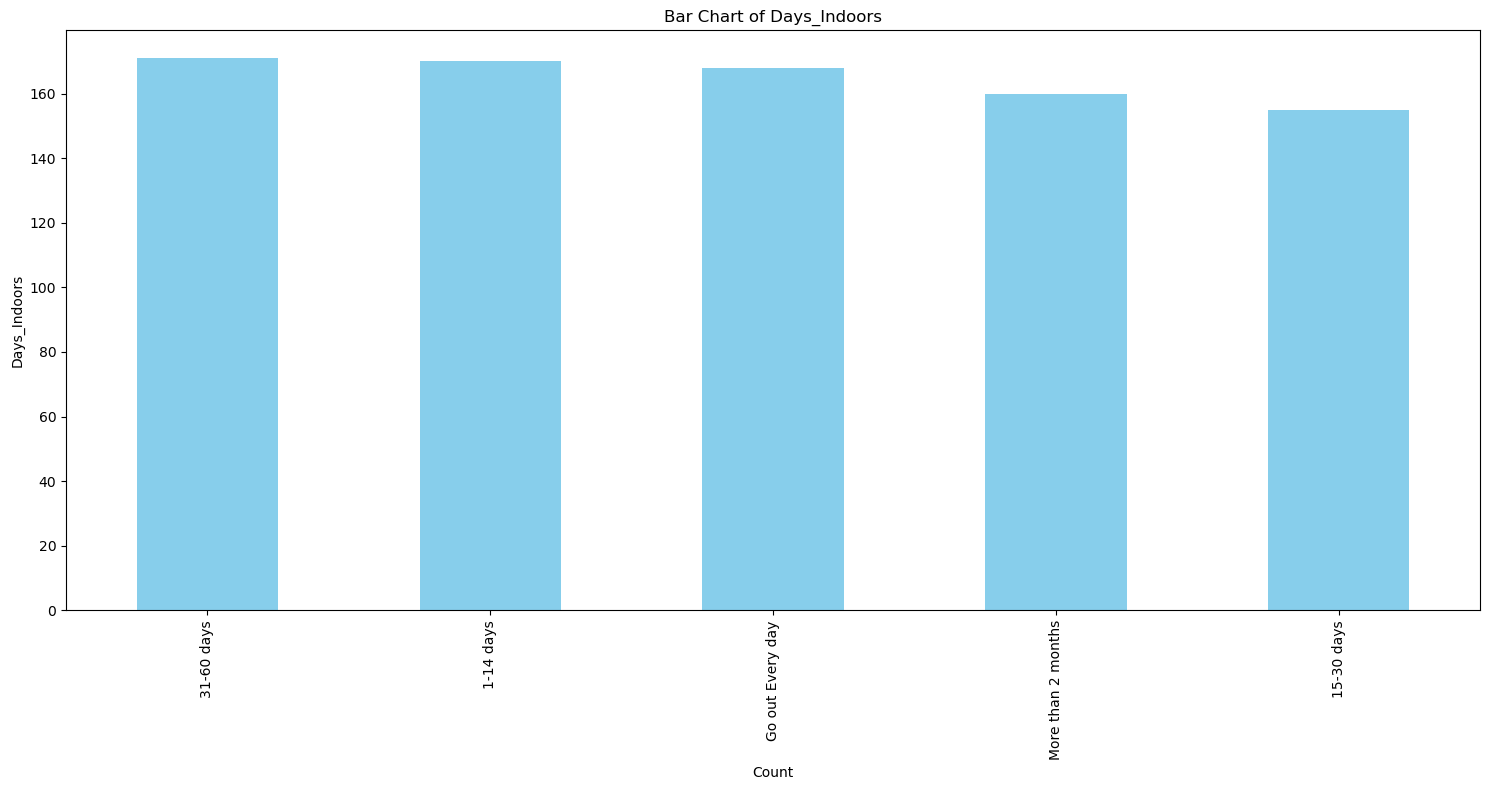

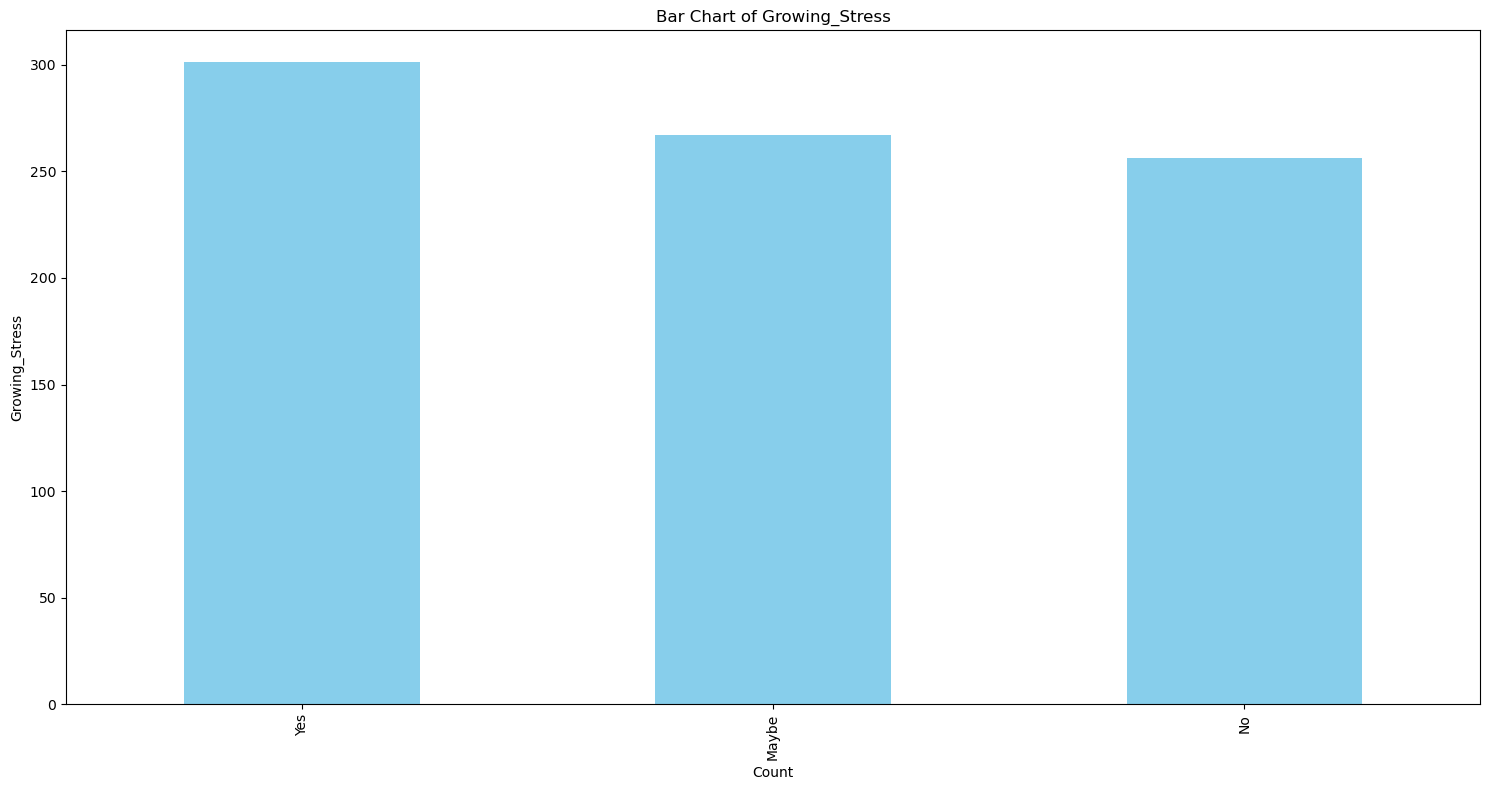

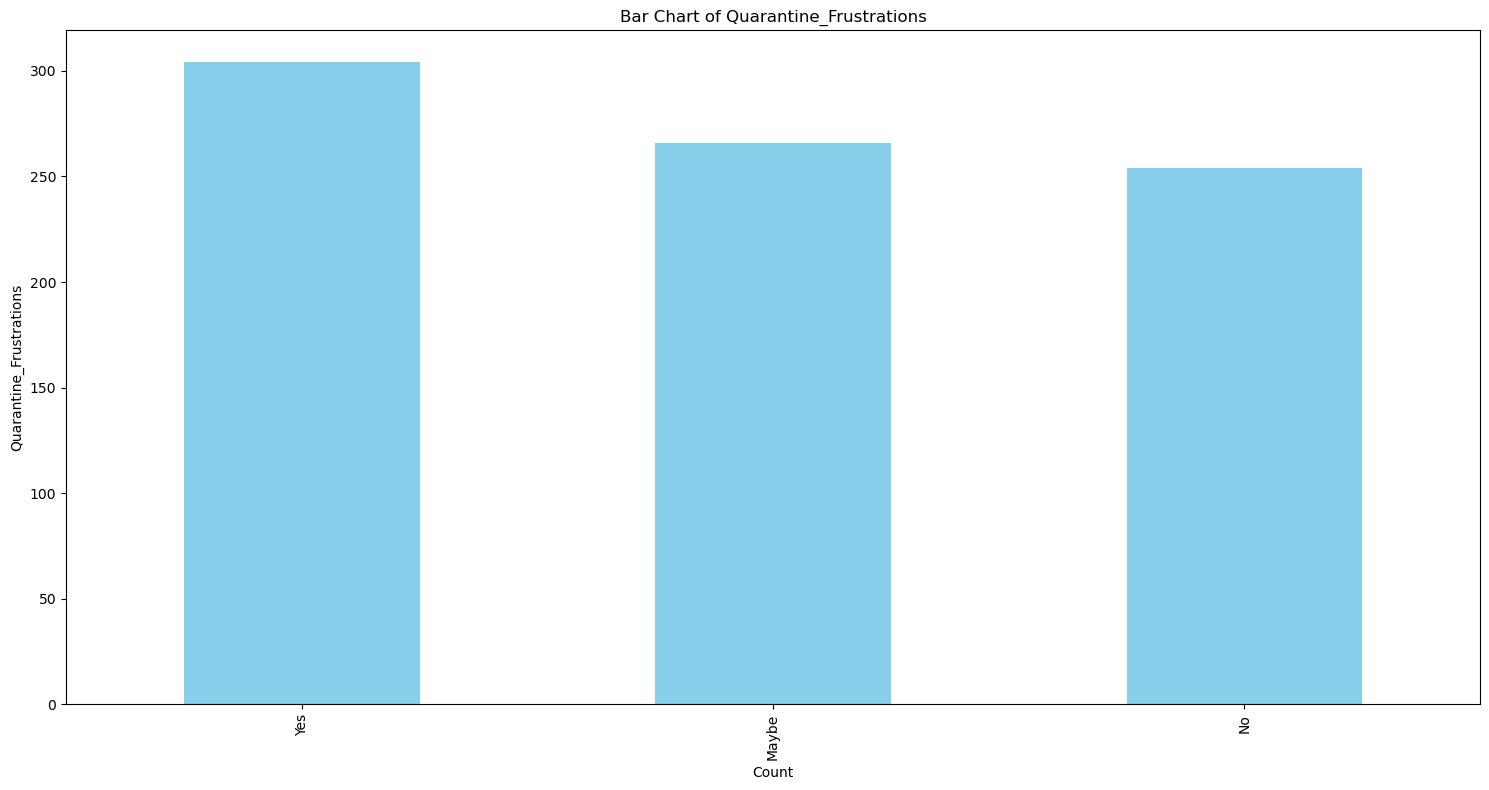

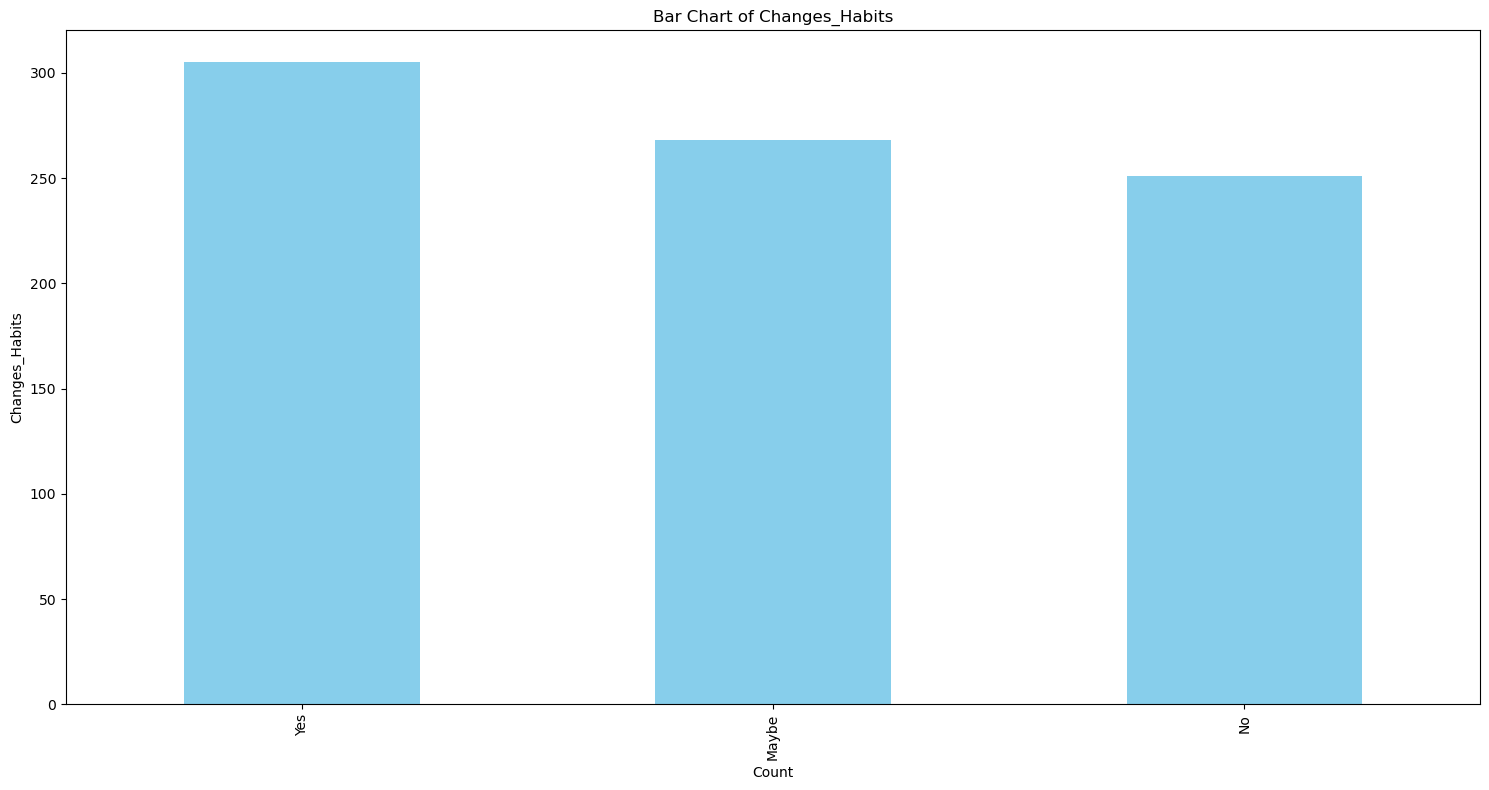

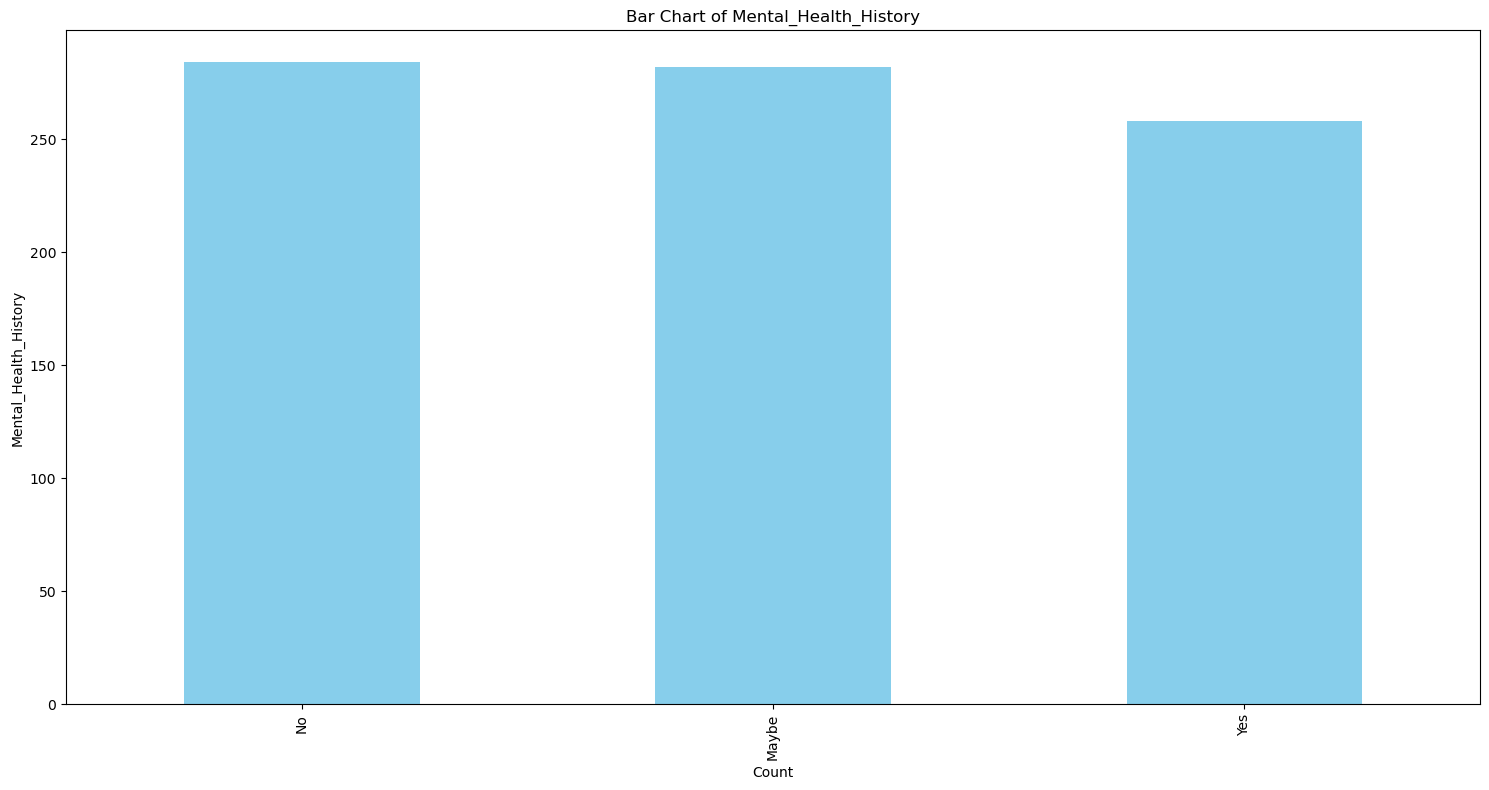

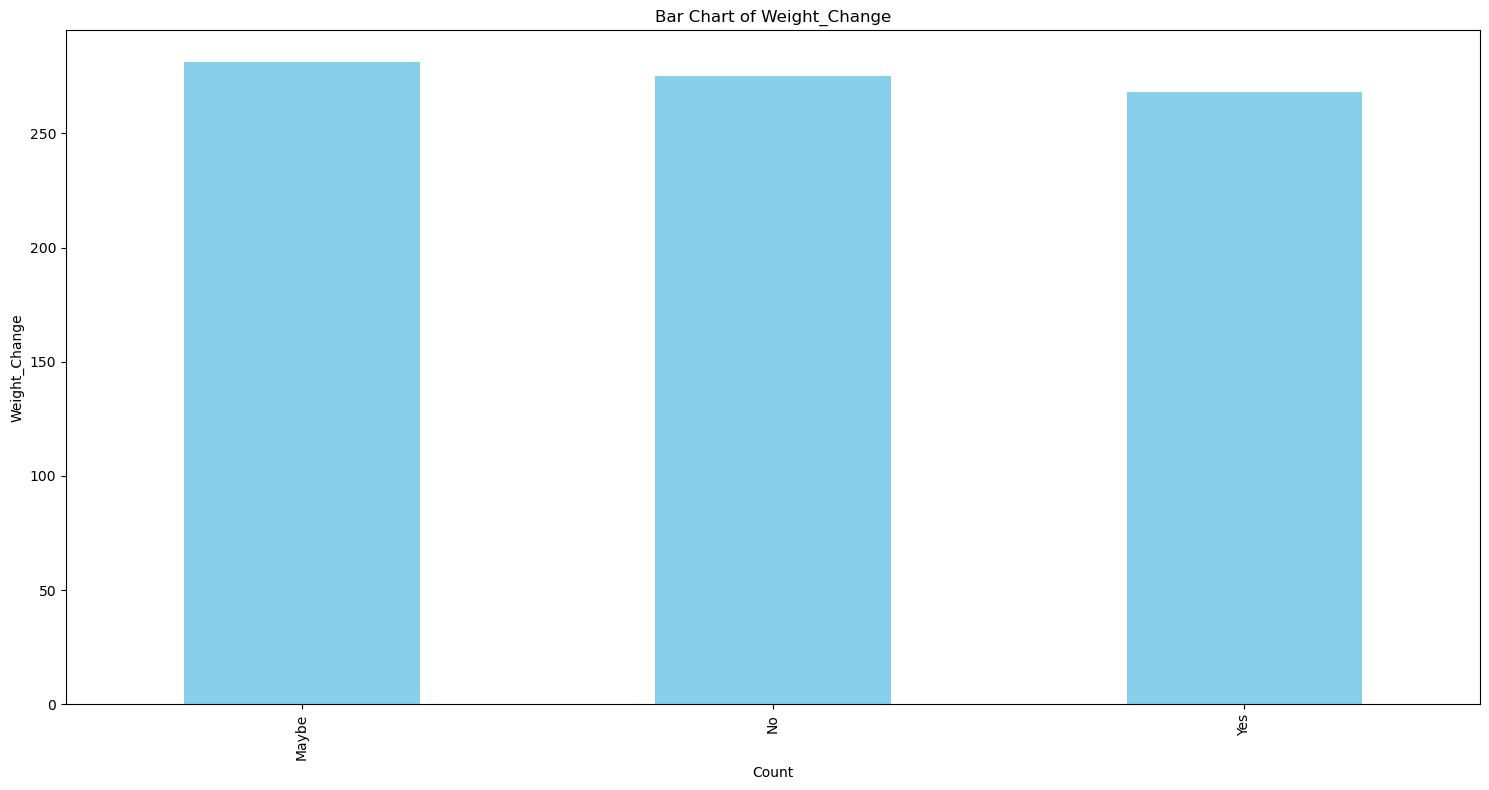

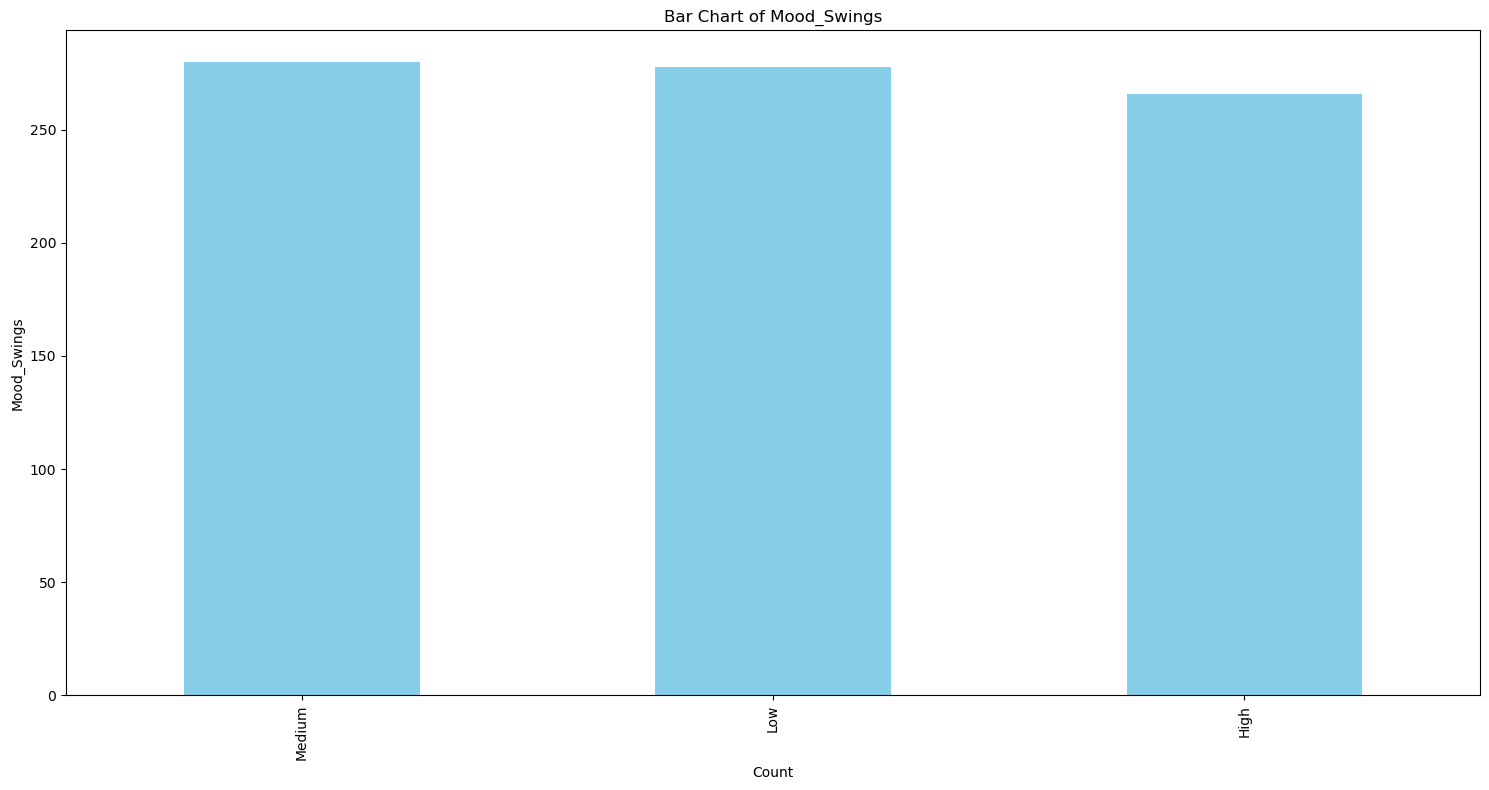

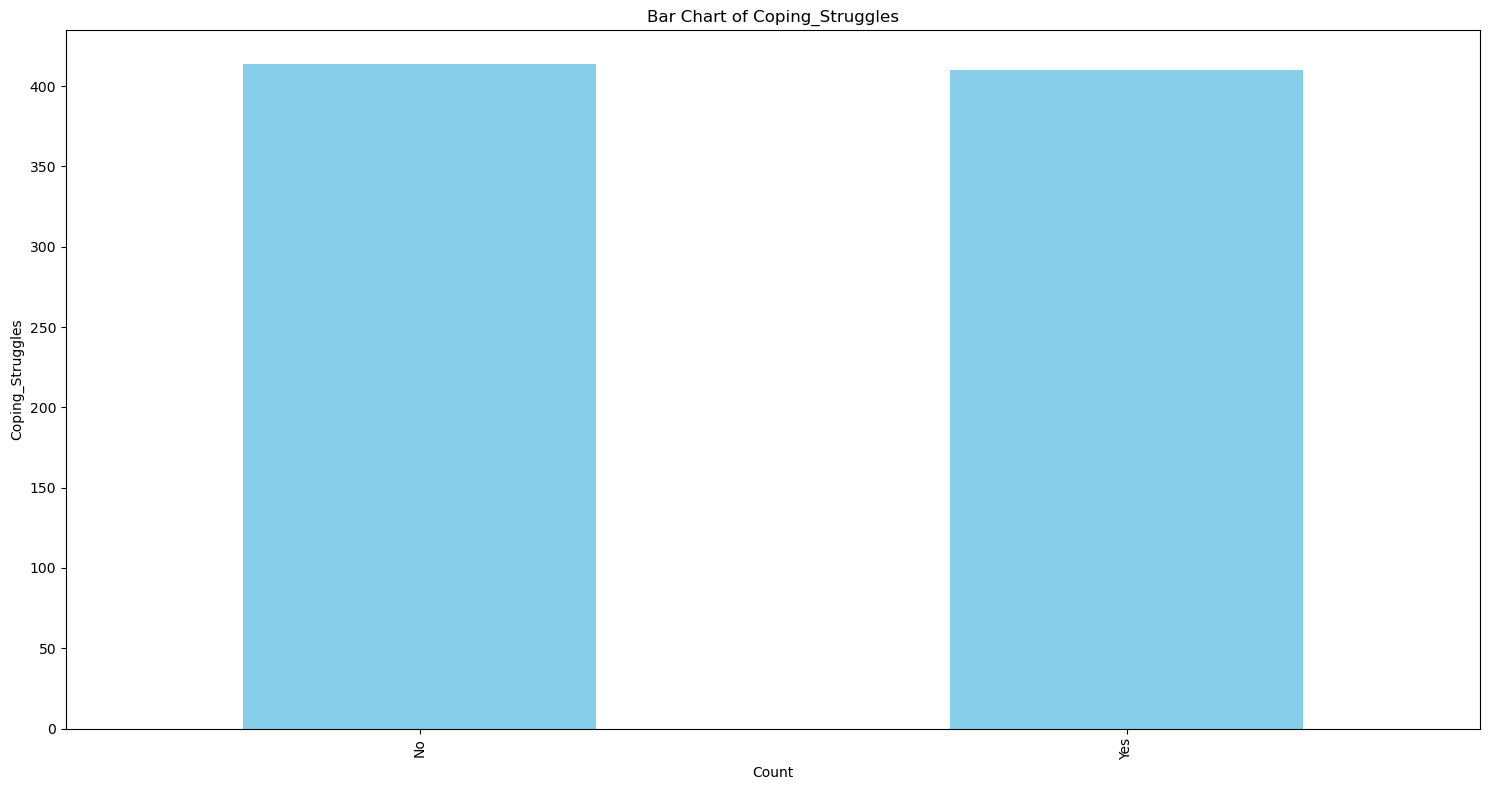

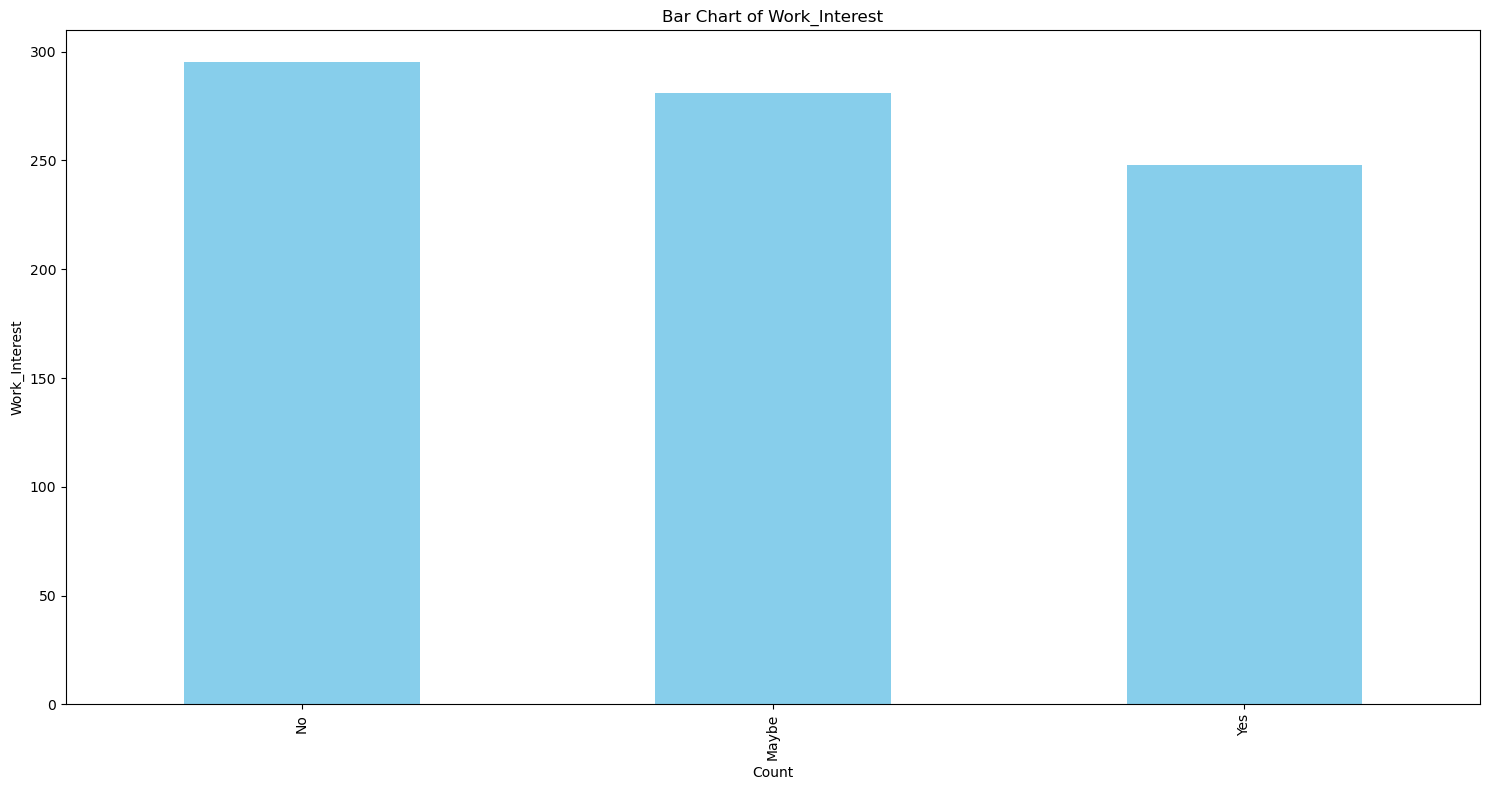

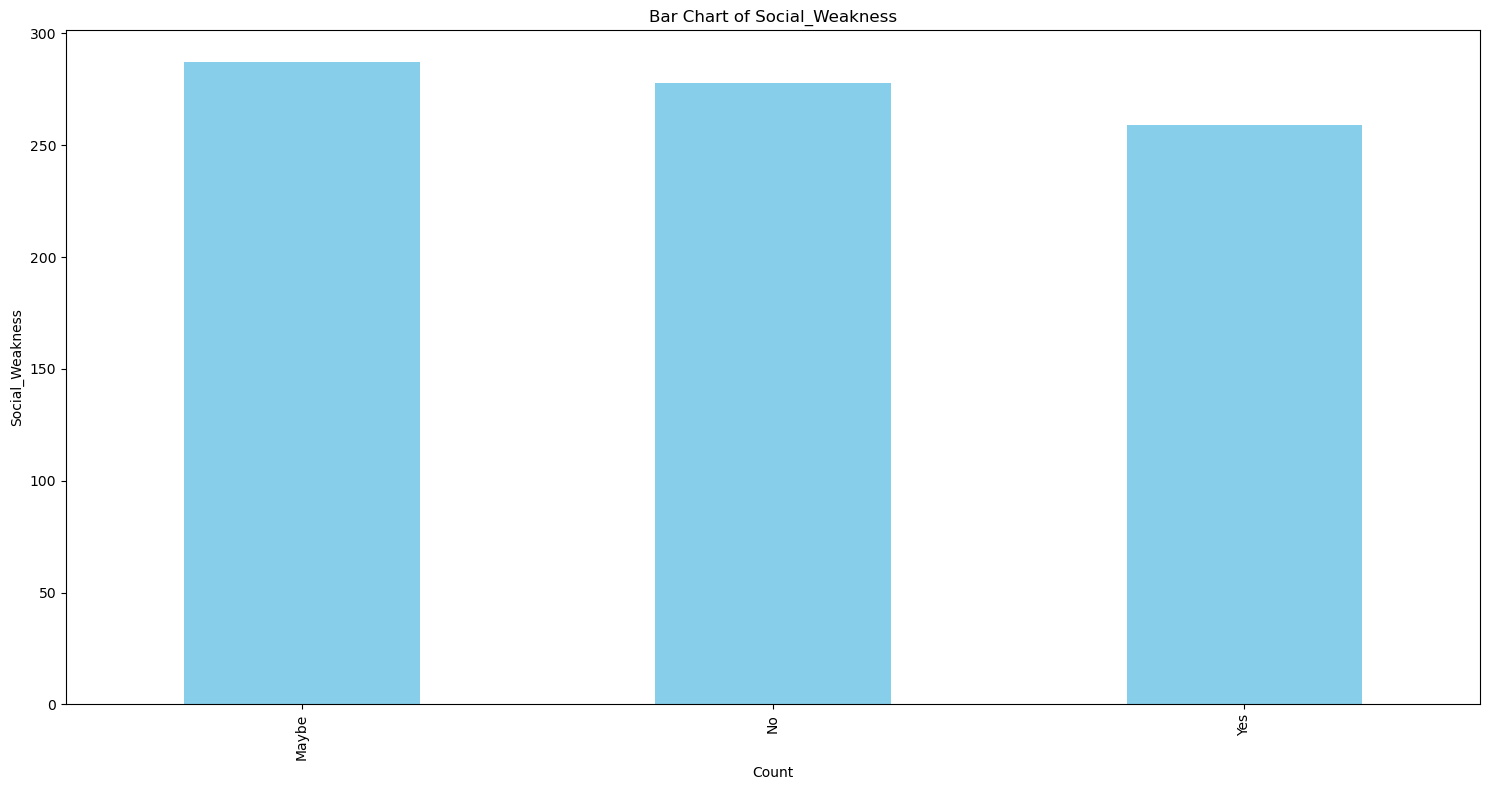

["Column 'Age' has 4 unique categories. The most common category is '30-Above' with 222 entries.",
 "Column 'Gender' has 2 unique categories. The most common category is 'Female' with 434 entries.",
 "Column 'Occupation' has 5 unique categories. The most common category is 'Housewife' with 185 entries.",
 "Column 'Days_Indoors' has 5 unique categories. The most common category is '31-60 days' with 171 entries.",
 "Column 'Growing_Stress' has 3 unique categories. The most common category is 'Yes' with 301 entries.",
 "Column 'Quarantine_Frustrations' has 3 unique categories. The most common category is 'Yes' with 304 entries.",
 "Column 'Changes_Habits' has 3 unique categories. The most common category is 'Yes' with 305 entries.",
 "Column 'Mental_Health_History' has 3 unique categories. The most common category is 'No' with 284 entries.",
 "Column 'Weight_Change' has 3 unique categories. The most common category is 'Maybe' with 281 entries.",
 "Column 'Mood_Swings' has 3 unique categor

In [86]:
# Initialize a list to store findings
categorical_findings = []

#set a for loop to loop through the categorical columns set above
for column in categorical_columns.columns:
    #set figure size
    plt.figure(figsize=(15, 8))

    #show the value counts
    value_counts = df_2[column].value_counts()

    # Selecting to show the top 50 categories for readability
    top_categories = value_counts[:20]

    # Using bar chart
    top_categories.plot(kind='bar', color='skyblue')

    #plot titles
    plt.title(f'Bar Chart of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

    # Adjust layout for readability
    plt.tight_layout()
    plt.show()

     # Collect findings
    categorical_findings.append(
        f"Column '{column}' has {len(value_counts)} unique categories. The most common category is '{value_counts.idxmax()}' with {value_counts.max()} entries."
    )

categorical_findings

### Findings:

There are **13 categorical columns** for which we have plotted the bar charts above. Here are some notable observations:

1. **Name**:
   - This column has **196,851** unique categories. The most common name is "Michael Smith," appearing **198** times. Given the high number of unique entries, this column is likely not useful for analysis and could be excluded from further steps.

2. **Marital Status**:
   - There are **4** categories (`Married`, `Widowed`, `Divorced`, `Single`). The most common category is `Married`, with **240,444** entries, suggesting a high prevalence of married individuals in the dataset.

3. **Education Level**:
   - This column has **5** categories, with `Bachelor's Degree` being the most common, represented by **124,329** entries. This indicates that the majority of individuals have at least a bachelor's level of education.

4. **Smoking Status**:
   - There are **3** categories (`Non-smoker`, `Former`, `Current`). `Non-smoker` is the most frequent, with **247,416** entries, reflecting a trend toward non-smoking habits among the individuals.

5. **Physical Activity Level**:
   - This column has **3** categories, with `Sedentary` being the most common, accounting for **176,850** entries. This suggests a relatively inactive lifestyle among many individuals in the dataset.

6. **Employment Status**:
   - There are **2** categories (`Employed`, `Unemployed`). `Employed` is the most common, with **265,659** entries, showing that a majority of individuals are employed.

7. **Alcohol Consumption**:
   - This column has **3** categories, with `Moderate` consumption being the most common, observed **173,440** times.

8. **Dietary Habits**:
   - There are **3** categories, with `Unhealthy` diets being the most prevalent, comprising **170,817** entries.

9. **Sleep Patterns**:
   - The column has **3** categories, with `Fair` sleep quality being the most common, appearing **196,789** times. This could indicate moderate sleep issues among the population.

10. **History of Mental Illness**:
    - There are **2** categories (`Yes`, `No`). `No` is the most common, with **287,943** entries, suggesting that the majority of individuals do not have a reported history of mental illness.

11. **History of Substance Abuse**:
    - This column has **2** categories, with `No` being the most frequent, recorded **284,880** times.

12. **Family History of Depression**:
    - There are **2** categories, with `No` appearing **302,515** times, indicating that most individuals do not report a family history of depression.

13. **Chronic Medical Conditions**:
    - This column has **2** categories, with `No` being the most prevalent, accounting for **277,561** entries, showing that most individuals do not have chronic medical conditions.



## Feature Engineering (First Iteration): <a class="anchor" id="fa"></a>


Next, I'll move to encoding these categorical variables and scaling the numerical data, which will prepare the dataset for modeling. Let's proceed.

In [87]:
# Encoding categorical variables
# Initialize label encoder
label_encoders = {}

# Encode binary categorical columns using label encoding
binary_columns = [
    "History of Mental Illness",
    "History of Substance Abuse",
    "Family History of Depression",
    "Chronic Medical Conditions",
    "Employment Status"
]

for col in binary_columns:
    le = LabelEncoder()
    df_2[col] = le.fit_transform(df_2[col])
    label_encoders[col] = le

KeyError: 'History of Mental Illness'

In [89]:
# Convert ordinal columns using mappings (for ordered categories)
ordinal_mappings = {
    "Smoking Status": {"Non-smoker": 0, "Former": 1, "Current": 2},
    "Physical Activity Level": {"Sedentary": 0, "Moderate": 1, "Active": 2},
    "Alcohol Consumption": {"Low": 0, "Moderate": 1, "High": 2},
    "Dietary Habits": {"Unhealthy": 0, "Moderate": 1, "Healthy": 2},
    "Sleep Patterns": {"Poor": 0, "Fair": 1, "Good": 2}
}

# Apply the mappings
for col, mapping in ordinal_mappings.items():
    df_2[col] = df_2[col].map(mapping)

KeyError: 'Smoking Status'

In [88]:
# Encode nominal columns using one-hot encoding
df_2 = pd.get_dummies(df_2, columns=["Marital Status", "Education Level"], drop_first=True)

# Feature Scaling
scaler = StandardScaler()
df_2["Income"] = scaler.fit_transform(df_2[["Income"]])

KeyError: "None of [Index(['Marital Status', 'Education Level'], dtype='object')] are in the [columns]"

In [ ]:
# Showing the processed data:
df_2.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [ ]:
# Let's take a look on our transformed DF
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Weight_Change            824 non-null    object
 9   Mood_Swings              824 non-null    object
 10  Coping_Struggles         824 non-null    object
 11  Work_Interest            824 non-null    object
 12  Social_Weakness          824 non-null    object
dtypes: object(13)
memory usage: 83.8+ KB
